In [ ]:
import csv
import pandas as pd
import re
import matplotlib.pyplot as plt

#为matplotlib添加中文字体（默认无法显示中文）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('data_selenium.csv',na_values=[''])

In [12]:
def list_to_str(list):
    str = ''
    for i in list:
        str += i
    return str

def list_num_add(list):
    num = 0
    for i in list:
        num += int(i)
    return num

## 分析通知人和附件下载量的关系
获取通知人和附件下载次数信息

               sum  count         mean
department                            
综合科           2059      3   686.333333
教学运行        156179    126  1239.515873
质量办          53334     35  1523.828571
教材中心         25595     12  2132.916667
实践科         269587     85  3171.611765
计划科          62964     19  3313.894737
教研教改        107169     23  4659.521739


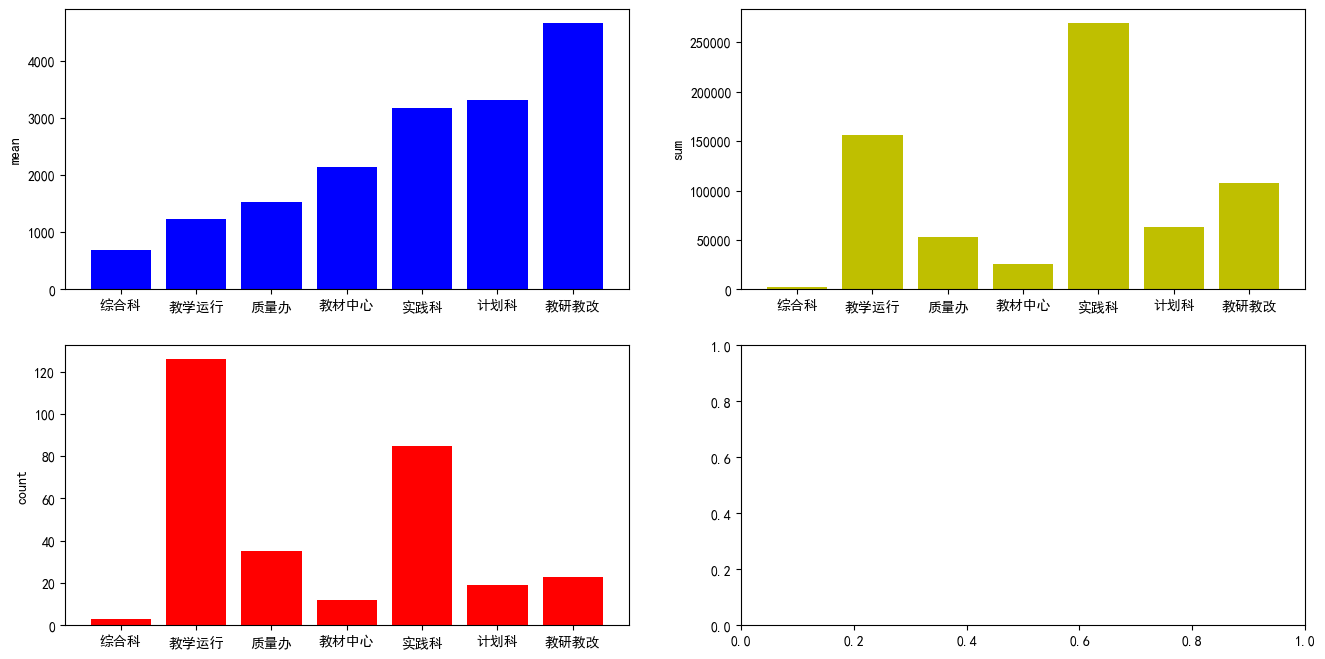

In [56]:
df_department_and_file = df.loc[:,['department','file_download_situation']]
df_department_and_file = df_department_and_file.dropna(subset=['file_download_situation'],ignore_index=True)
df1 = df_department_and_file["file_download_situation"]
new_file_download_situation = []
#获取下载次数的数字
for i in df1:
    download_num_list = re.findall('[0-9]+',list_to_str(re.findall('已下载.*?次',i)))
    download_num = list_num_add(download_num_list)
    new_file_download_situation.append(download_num)
df_department_and_file['file_download_situation'] = new_file_download_situation

df_department_and_file = df_department_and_file.groupby('department')['file_download_situation'].agg(['sum','count','mean'])
df_department_and_file=df_department_and_file.sort_values('mean')
print(df_department_and_file.to_string())

f,ax=plt.subplots(2,2,figsize=(16,8))
x=df_department_and_file.index
y1=df_department_and_file['mean']
y2=df_department_and_file['sum']
y3=df_department_and_file['count']
ax[0,0].bar(x,y1,color='b') ; ax[0,0].set_ylabel('mean')
ax[0,1].bar(x,y2,color='y') ; ax[0,1].set_ylabel('sum')
ax[1,0].bar(x,y3,color='r') ; ax[1,0].set_ylabel('count')
plt.show()

由此可以看出；
教学运行虽然很努力发了很多通知，下载量也很多，但其附件平均下载量极低，可猜测其通知一般比较水。
教研教改虽然出手不多，但一出手就惊为天人，平均下载极高，说明其通知的重要性。

## 通知发布的高峰期

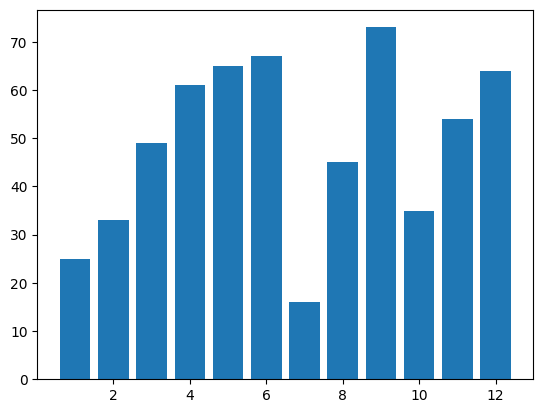

In [43]:
df_time = df['time']
timer = 0
#去除无关文字
for i in df_time:
    j = re.sub('发布时间：','',i)
    df_time[timer]=j
    timer += 1
#日期排序
df_time = pd.to_datetime(df_time).sort_values(ignore_index=True)
#只选取2022-07-01至2025-07-01的数据
df_time = df_time[(df_time>'2022-07-01')&(df_time<'2025-07-01')]
df_time = df_time.dt.month
df_time_analysis = pd.DataFrame(columns=['月份','文件数'])
df_time_analysis['月份']=df_time
df_time_analysis['文件数']=df_time
df_time_analysis = df_time_analysis.groupby('月份')['文件数'].count()

x=range(1,13)
y=df_time_analysis
p=plt.bar(x,y)
plt.show()

#print(df_time_analysis.to_string())

可以看出9月和6月的通知发布数是最多的。这刚好是在暑假前后。一边是毕业季，一边是开学季。通知量高确实是合理的。

## 正文字数与下载量的关系

In [5]:
df_content_and_download = df.loc[:,['content','file_download_situation']].dropna(subset=['file_download_situation'],ignore_index=True)
df_content_and_download['file_download_situation']=df_content_and_download['file_download_situation'].map(
    lambda i:list_num_add(re.findall('[0-9]+',list_to_str(re.findall('已下载.*?次',i))))
    )
df_content_and_download['content']=df_content_and_download['content'].map(
    lambda i:len(i)
)
df_content_and_download = df_content_and_download.sort_values('file_download_situation')
df_content_and_download.columns=['正文字数','下载量']
print(df_content_and_download.to_string())

     正文字数    下载量
227   627     66
224   354    124
214   172    141
225  2033    176
216   139    189
206   144    199
204   142    216
207   160    226
228   808    230
215   142    248
209   157    250
194   141    274
213   175    277
211   153    278
226   486    286
184   630    287
229   350    306
187   702    333
193  1260    354
196  1192    366
200   145    373
208   147    374
217   169    406
182   160    426
202  1389    439
164   158    488
185   988    493
205   167    498
212   574    503
178   162    512
210   143    515
203   239    523
153   143    527
171   146    540
199   155    548
142   637    558
181   152    559
218  1950    565
169   878    575
147   147    575
180   167    594
168   143    595
109   144    609
197   365    618
150  1928    627
108   155    637
122   161    642
159   158    653
110   143    661
219   178    671
120   154    671
198  2874    674
111   144    682
154   146    686
113   140    697
103   142    704
107   144    709
161   154    7

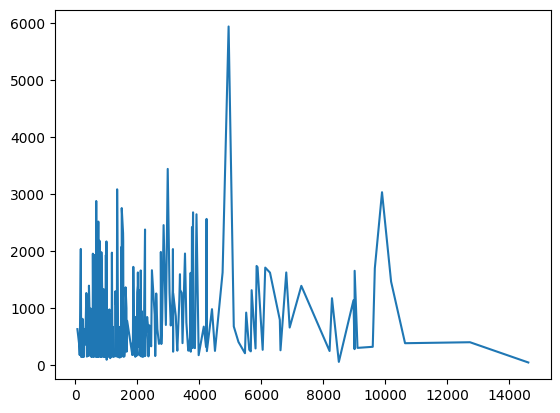

In [9]:
x=df_content_and_download["下载量"]
y=df_content_and_download["正文字数"]
p=plt.plot(x,y)
plt.show()

说实话这个是真看不出来有什么关系。